In [7]:
### INITIALISATION du dataset depuis Google Drive (accès à distance) ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Détecter l'environnement d'exécution
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Mode Google Colab
    from google.colab import drive
    print("Montage de Google Drive...")
    drive.mount('/content/drive')
    
    # Chemin vers le dossier du dataset sur Google Drive (Colab)
    DATA_DRIVE_PATH = '/content/drive/My Drive'
    
    # Chercher le dossier du dataset
    print("Recherche du dataset dans My Drive...")
    my_drive_contents = os.listdir(DATA_DRIVE_PATH)
    
    # Chercher les dossiers contenant train_bird et valid_bird
    dataset_path = None
    for item in my_drive_contents:
        item_path = os.path.join(DATA_DRIVE_PATH, item)
        if os.path.isdir(item_path):
            if 'train_bird' in os.listdir(item_path):
                dataset_path = item_path
                print(f"✓ Dataset trouvé: {item}")
                break
    
    if dataset_path is None:
        dataset_path = DATA_DRIVE_PATH
        print(f"⚠ Dossiers du dataset non trouvés dans les sous-répertoires")
        print(f"Utilisation du chemin : {dataset_path}")
else:
    # Mode Jupyter local - utiliser gdown pour accès à distance
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gdown", "-q"])
    
    import gdown
    
    print("Mode Jupyter local détecté")
    print("Accès à Google Drive via gdown...")
    
    # ID du dossier Drive (depuis le lien)
    DRIVE_FOLDER_ID = "1kHTcb7OktpYB9vUaZPLQ3ywXFYMUdQsP"
    
    # On va lister les fichiers sans télécharger
    # Pour l'instant, on affiche un message
    print(f"✓ Dataset accessible via le lien : https://drive.google.com/drive/folders/{DRIVE_FOLDER_ID}")
    print("Note : Pour accéder aux fichiers en détail, authentifiez-vous si demandé")
    
    # On peut créer un dossier virtuel pour les chemins
    dataset_path = f"/drive/folders/{DRIVE_FOLDER_ID}"

# Définir les chemins des données d'entraînement et validation
TRAIN_PATH = os.path.join(dataset_path, 'train_bird')
VALID_PATH = os.path.join(dataset_path, 'valid_bird')

# Vérifier la structure du dataset
print("\nVérification de la structure du dataset...")
train_classes = None
valid_classes = None

try:
    if os.path.exists(TRAIN_PATH):
        train_classes = sorted([d for d in os.listdir(TRAIN_PATH) 
                               if os.path.isdir(os.path.join(TRAIN_PATH, d))])
        print(f"✓ Classes d'entraînement : {len(train_classes)}")
        for cls in train_classes[:3]:
            img_count = len(os.listdir(os.path.join(TRAIN_PATH, cls)))
            print(f"  - {cls}: {img_count} images")
        if len(train_classes) > 3:
            print(f"  ... et {len(train_classes) - 3} autres classes")
except Exception as e:
    print(f"⚠ Erreur lors de l'accès à train_bird: {e}")

try:
    if os.path.exists(VALID_PATH):
        valid_classes = sorted([d for d in os.listdir(VALID_PATH) 
                               if os.path.isdir(os.path.join(VALID_PATH, d))])
        print(f"✓ Classes de validation : {len(valid_classes)}")
except Exception as e:
    print(f"⚠ Erreur lors de l'accès à valid_bird: {e}")

print("\n✓ Initialisation terminée !")

Mode Jupyter local détecté
Accès à Google Drive via gdown...
✓ Dataset accessible via le lien : https://drive.google.com/drive/folders/1kHTcb7OktpYB9vUaZPLQ3ywXFYMUdQsP
Note : Pour accéder aux fichiers en détail, authentifiez-vous si demandé

Vérification de la structure du dataset...

✓ Initialisation terminée !


Nombre de classes : 25


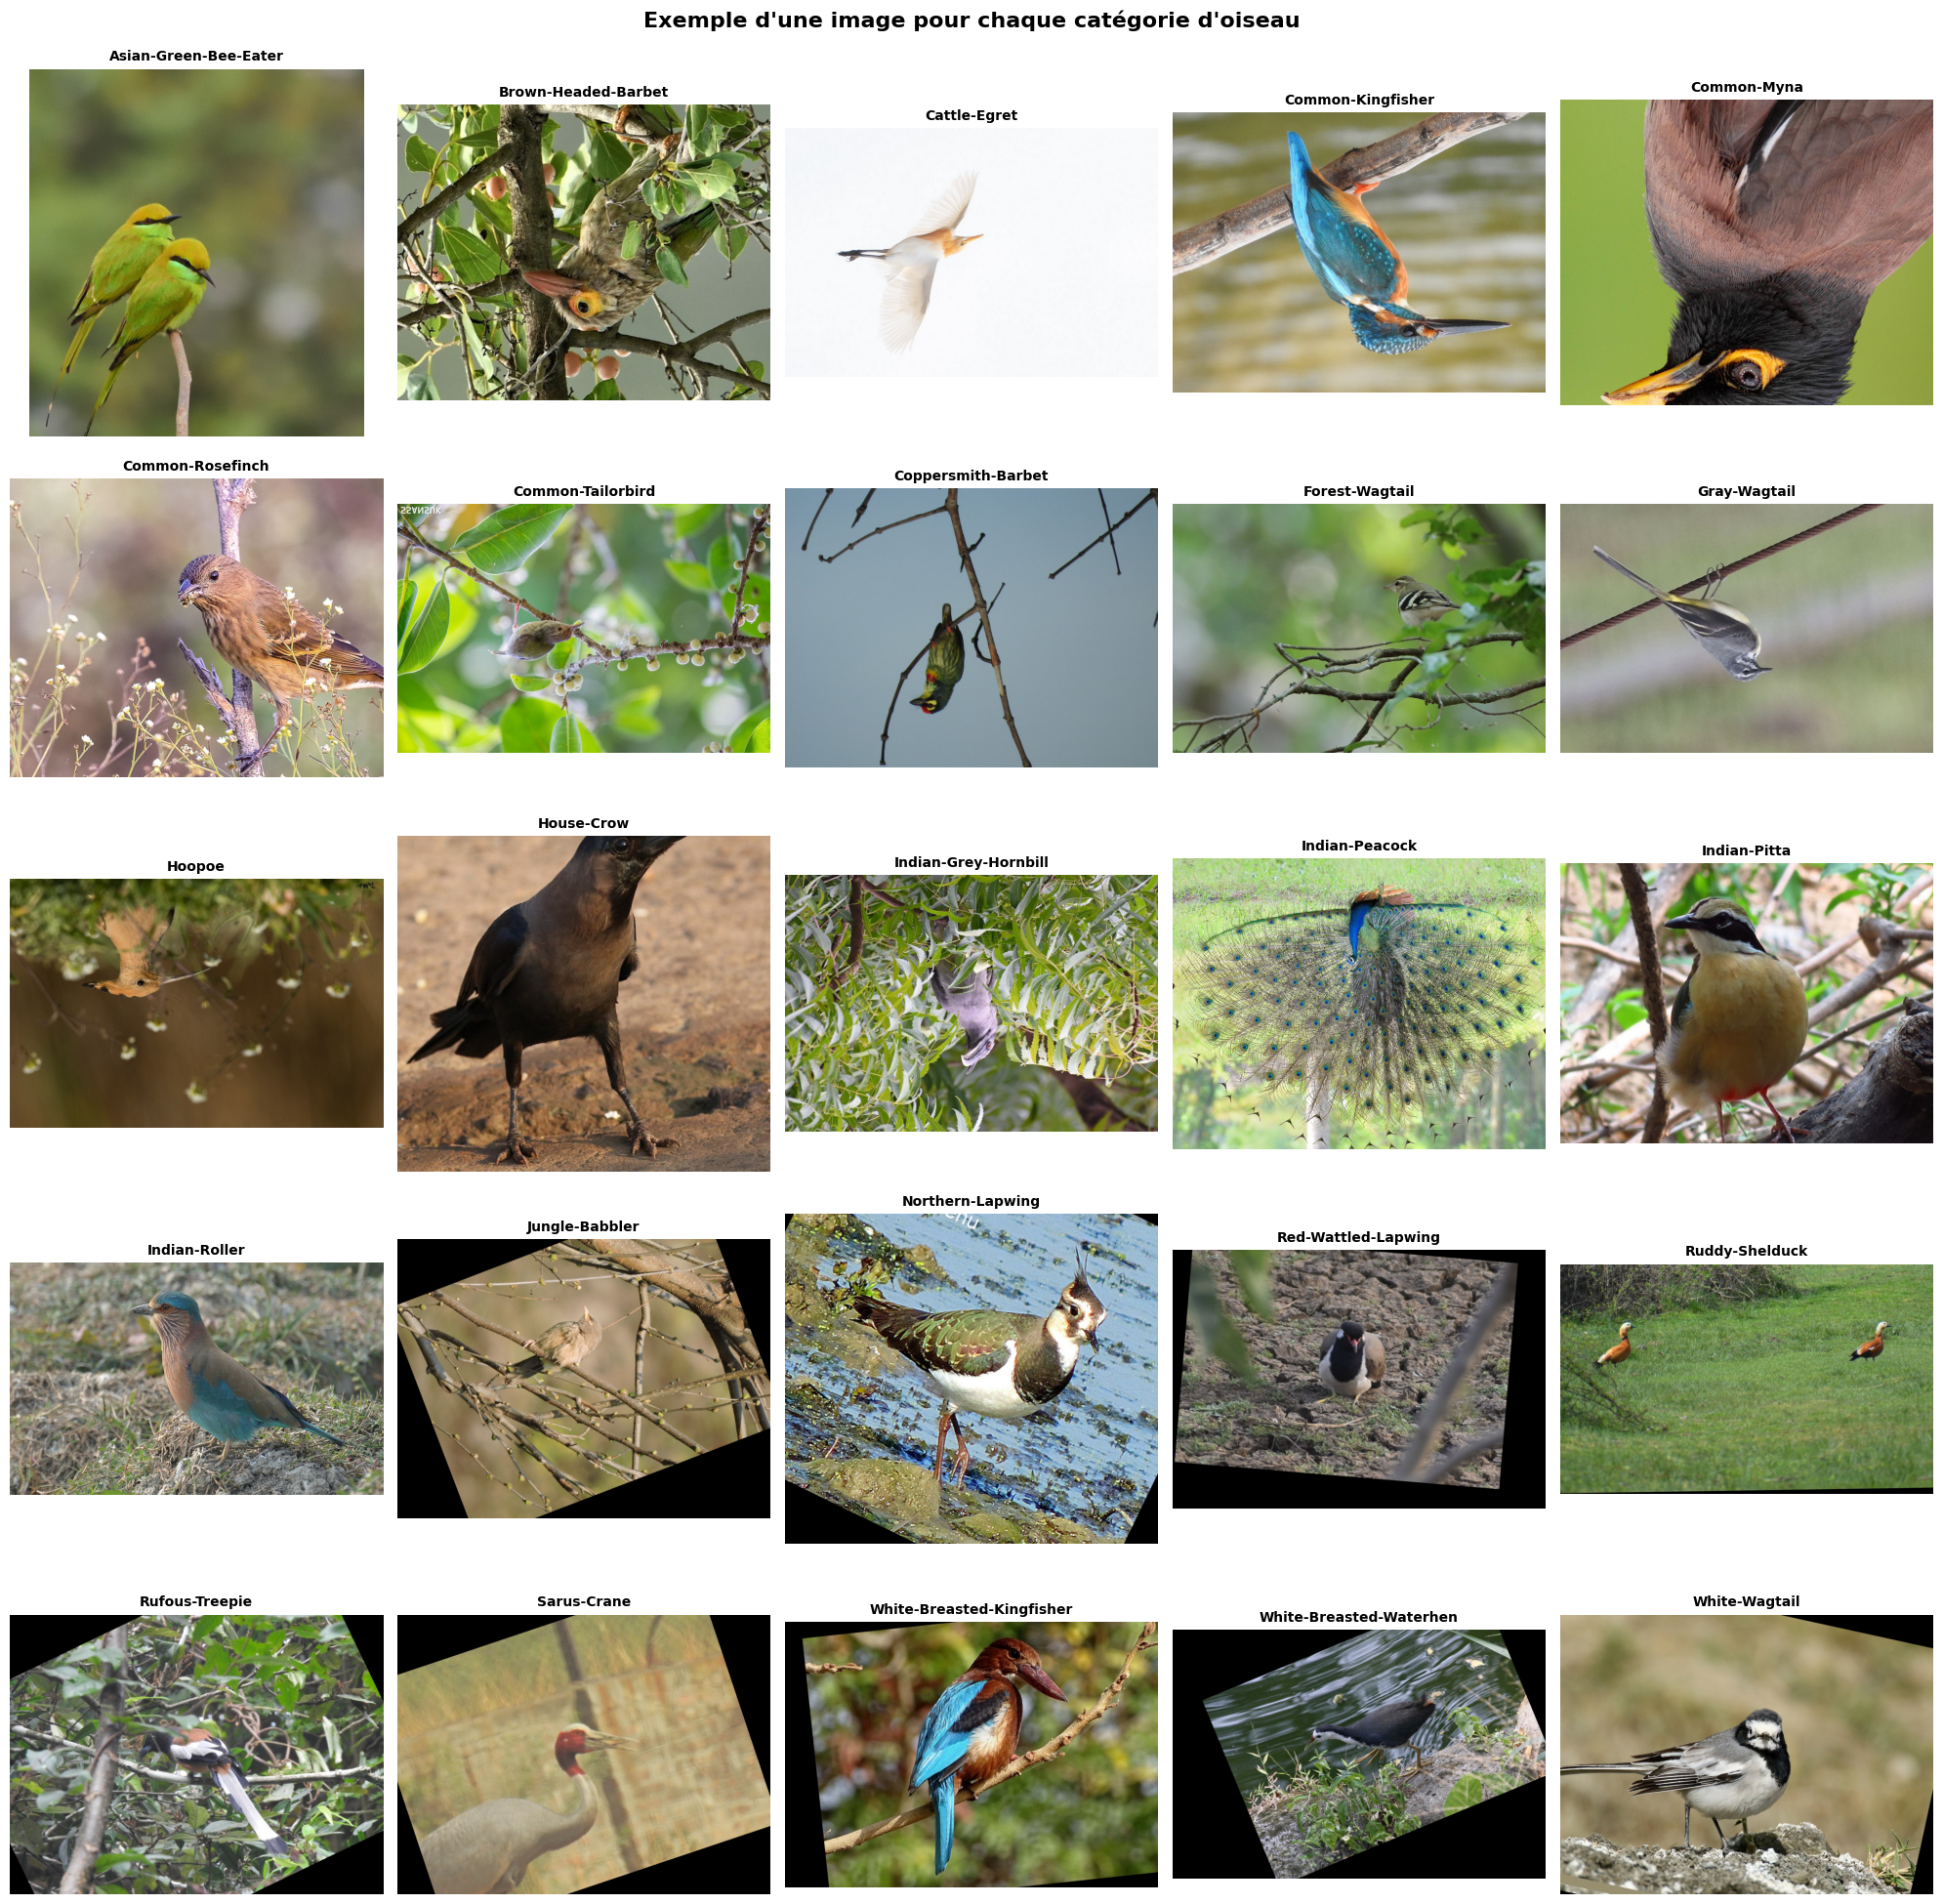


✓ Affichage de 25 catégories d'oiseaux


In [8]:
### Affichage d'une image par catégorie d'oiseau ###

import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Déterminer le chemin d'accès (local ou drive)
if os.path.exists('./data/train_bird'):
    # Mode local
    base_path = './data/train_bird'
else:
    # Mode drive
    base_path = TRAIN_PATH

# Obtenir la liste des classes
if os.path.exists(base_path):
    classes = sorted([d for d in os.listdir(base_path) 
                     if os.path.isdir(os.path.join(base_path, d))])
    
    print(f"Nombre de classes : {len(classes)}")
    
    # Créer une grille pour afficher les images
    n_classes = len(classes)
    n_cols = 5
    n_rows = (n_classes + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    axes = axes.flatten()  # Aplatir pour itérer facilement
    
    # Afficher une image pour chaque classe
    for idx, class_name in enumerate(classes):
        class_path = os.path.join(base_path, class_name)
        images = [img for img in os.listdir(class_path) 
                 if img.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
        
        if images:
            # Sélectionner une image aléatoire
            random_image = random.choice(images)
            image_path = os.path.join(class_path, random_image)
            
            try:
                # Charger et afficher l'image
                img = Image.open(image_path)
                axes[idx].imshow(img)
                axes[idx].set_title(class_name, fontsize=10, fontweight='bold')
                axes[idx].axis('off')
            except Exception as e:
                axes[idx].text(0.5, 0.5, f"Erreur: {class_name}", 
                             ha='center', va='center')
                axes[idx].axis('off')
        else:
            axes[idx].text(0.5, 0.5, f"Pas d'images\n{class_name}", 
                         ha='center', va='center')
            axes[idx].axis('off')
    
    # Masquer les axes inutilisés
    for idx in range(n_classes, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Exemple d\'une image pour chaque catégorie d\'oiseau', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Affichage de {n_classes} catégories d'oiseaux")
else:
    print(f"⚠ Le chemin {base_path} n'existe pas")
    print("Assurez-vous que le dataset est correctement chargé")